In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/02_intermediate/stroke_data_ref.csv")

# Data Understanding

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,53219,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,7725,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,50373,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,41122,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,68249,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0


In [6]:
print("Dataset Shape:", df.shape)

Dataset Shape: (4088, 12)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3926 non-null   float64
 10  smoking_status     4088 non-null   object 
 11  stroke             4088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 383.4+ KB


In [8]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

print(missing_df.sort_values(by='Percentage', ascending=False))

                   Missing Values  Percentage
bmi                           162    3.962818
id                              0    0.000000
gender                          0    0.000000
age                             0    0.000000
hypertension                    0    0.000000
heart_disease                   0    0.000000
ever_married                    0    0.000000
work_type                       0    0.000000
Residence_type                  0    0.000000
avg_glucose_level               0    0.000000
smoking_status                  0    0.000000
stroke                          0    0.000000


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3926.000000,4088.000000
mean,36439.755626,43.143395,0.098092,0.054550,106.098173,28.937061,0.048924
std,21190.524581,22.559356,0.297475,0.227127,45.313054,7.942361,0.215735
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17485.500000,25.000000,0.000000,0.000000,77.287500,23.600000,0.000000
50%,36817.000000,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,54797.500000,61.000000,0.000000,0.000000,114.027500,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


In [10]:
df.describe(exclude = ['float', 'int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,4088,4088,4088,4088,4088
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2396,2672,2332,2096,1517


In [11]:
print(df['work_type'].unique().tolist())
print(df['Residence_type'].unique().tolist())
print(df['smoking_status'].unique().tolist())
print(df['gender'].unique().tolist())

['Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked']
['Urban', 'Rural']
['smokes', 'formerly smoked', 'Unknown', 'never smoked']
['Male', 'Female', 'Other']


In [12]:
col = ["gender", "hypertension", "heart_disease", "smoking_status", 
       "ever_married", "work_type", "Residence_type", "stroke"]

for i in col:
    print(f"============Values in {i}============\n{df[i].value_counts()}\n")

============Values in gender============
gender
Female    2396
Male      1691
Other        1
Name: count, dtype: int64

============Values in hypertension============
hypertension
0    3687
1     401
Name: count, dtype: int64

============Values in heart_disease============
heart_disease
0    3865
1     223
Name: count, dtype: int64

============Values in smoking_status============
smoking_status
never smoked       1517
Unknown            1239
formerly smoked     698
smokes              634
Name: count, dtype: int64

============Values in ever_married============
ever_married
Yes    2672
No     1416
Name: count, dtype: int64

============Values in work_type============
work_type
Private          2332
Self-employed     666
children          548
Govt_job          528
Never_worked       14
Name: count, dtype: int64

============Values in Residence_type============
Residence_type
Urban    2096
Rural    1992
Name: count, dtype: int64

============Values in stroke============
stroke
0    388

Features:

- **id**: Unique identifier for each patient (Integer)

- **gender**: Gender of the patient (Categorical: Male, Female, Other)

- **age**: Age of the patient in years (Numeric)

- **hypertension**: Hypertension status (Binary: 0 = No, 1 = Yes)

- **heart_disease**: Heart disease status (Binary: 0 = No, 1 = Yes)

- **ever_married**: Marital status (Categorical: Yes, No)

- **work_type**: Type of work (Categorical: Private, Self-employed, Govt_job, children, Never_worked)

- **Residence_type**: Residence area (Categorical: Urban, Rural)

- **avg_glucose_level**: Average blood glucose level (Numeric)

- **bmi**: Body Mass Index (Numeric, may contain missing values)

- **smoking_status**: Smoking habits (Categorical: formerly smoked, never smoked, smokes, Unknown)

- **stroke**: Stroke occurrence (Binary: 0 = No, 1 = Yes)

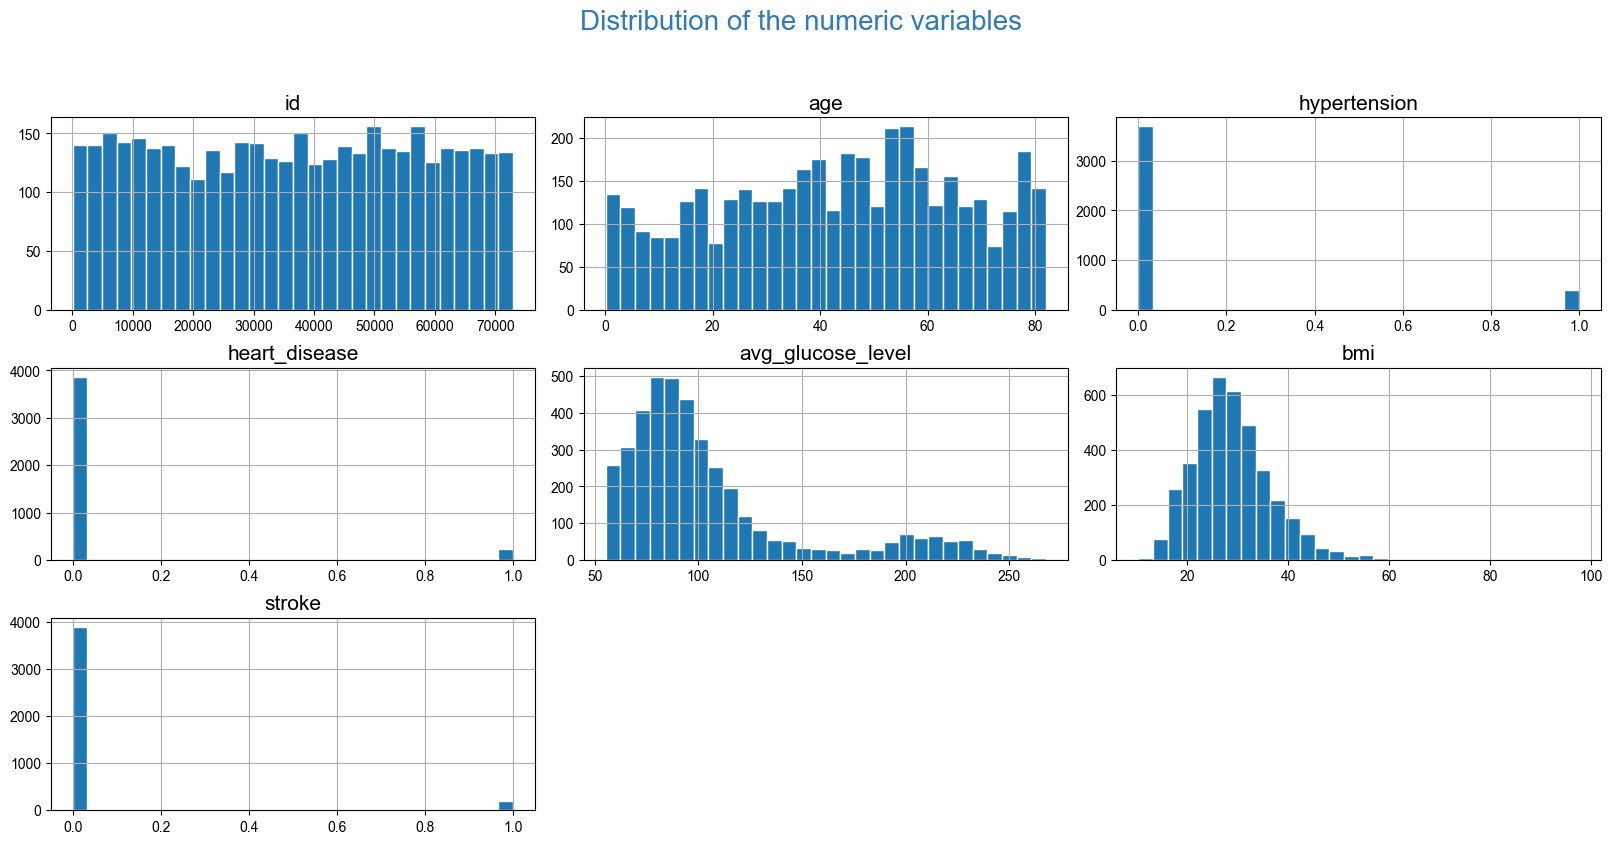

In [13]:
fig = df.hist(figsize = (20, 9), bins = 30, edgecolor = "white")
plt.grid(axis = "x", alpha = 1)
plt.suptitle("Distribution of the numeric variables", fontsize = 20, y = 1, color = "#337ab7")

plt.subplots_adjust(wspace = 0.1) 

for ax in fig.flatten():
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel(ax.get_ylabel())
    ax.set_title(ax.get_title(), fontsize = 15)
    sns.set(style="whitegrid")

plt.show()

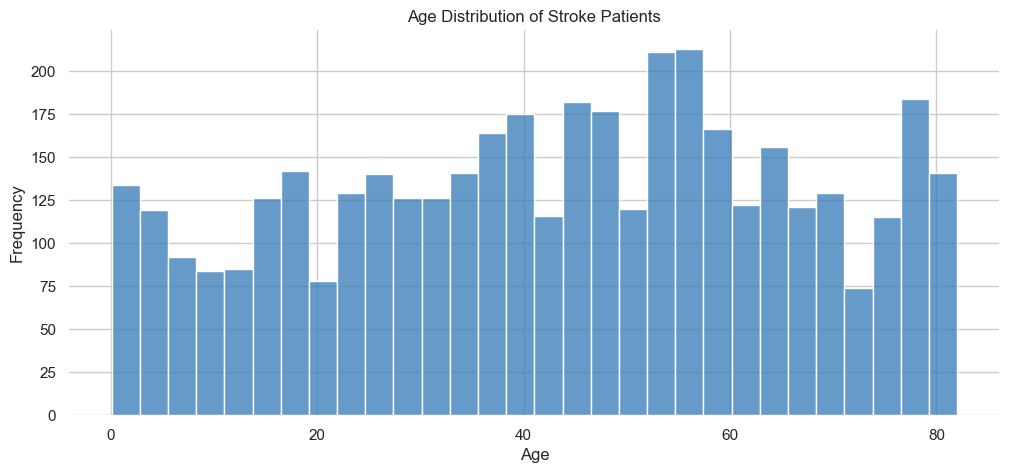

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(df['age'], bins=30, color="#337ab7")
plt.title('Age Distribution of Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.despine(left=True, bottom=True)
plt.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_24996\2161599759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette=["#337ab7", "#ff9999"])


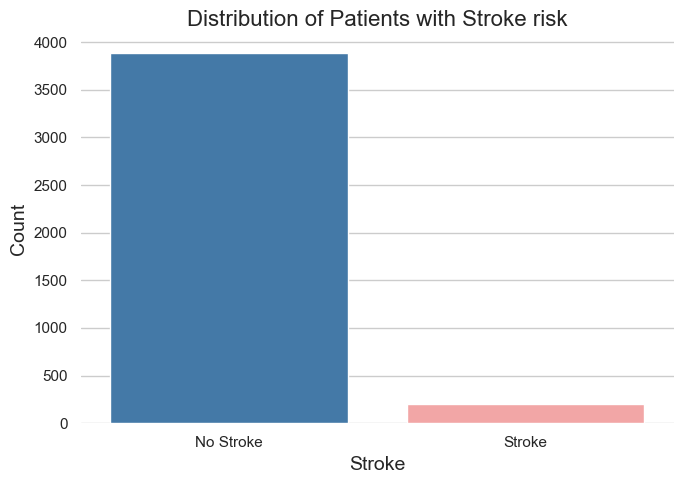

In [15]:
# stroke distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='stroke', data=df, palette=["#337ab7", "#ff9999"])
plt.title('Distribution of Patients with Stroke risk', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_24996\1353356799.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)


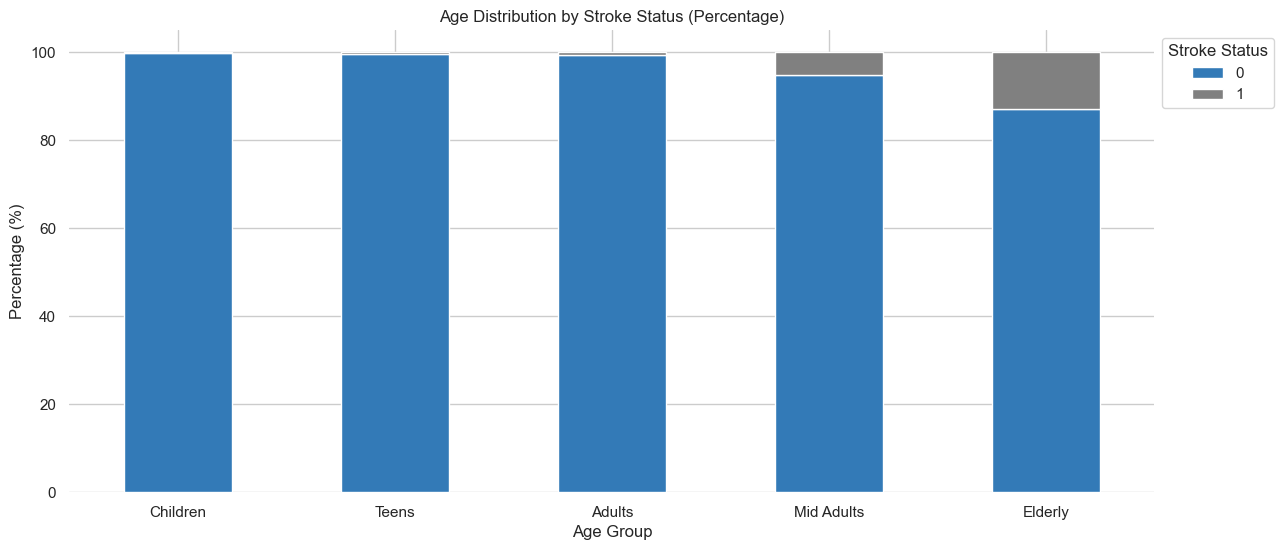

In [16]:
bins = [0, 13, 18, 45, 60, 100]
labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

counts = df.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

percentages.plot(kind='bar', stacked=True, figsize=(14,6), color=['#337ab7', 'grey'])

plt.title('Age Distribution by Stroke Status (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Stroke Status', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=0) 
plt.show()

C:\Users\alexr\AppData\Local\Temp\ipykernel_24996\1123696244.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['bmi_group', 'stroke']).size().unstack(fill_value=0)


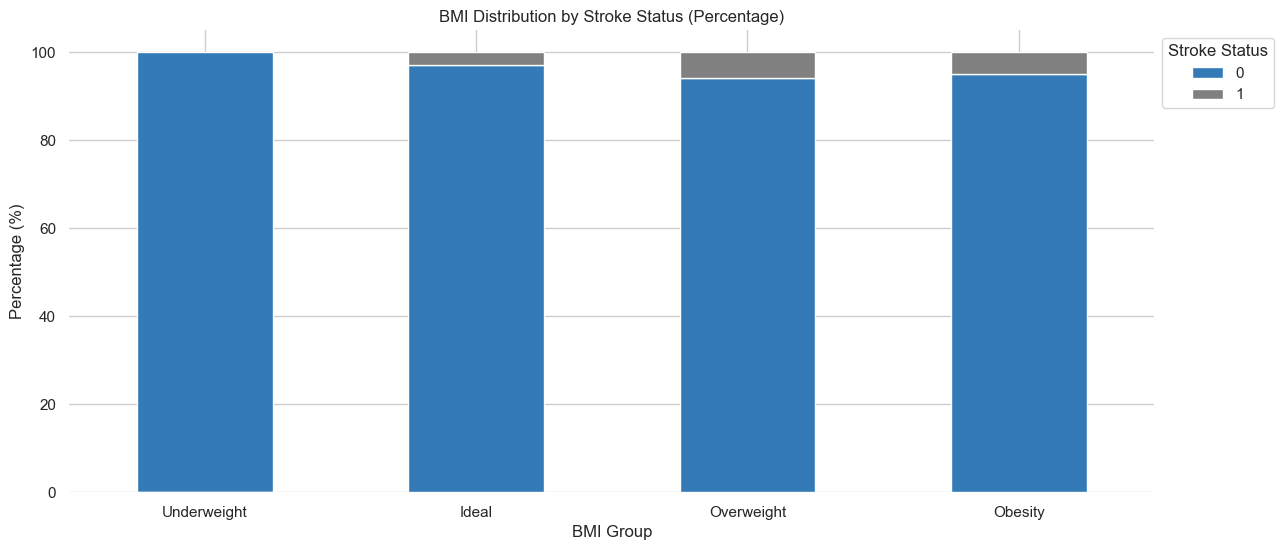

In [17]:
bins = [0, 19, 25, 30, 1000]
labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

counts = df.groupby(['bmi_group', 'stroke']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

percentages.plot(kind='bar', stacked=True, figsize=(14,6), color=['#337ab7', 'grey'])

plt.title('BMI Distribution by Stroke Status (Percentage)')
plt.xlabel('BMI Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Stroke Status', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=0) 
plt.show()